In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### データの読み込み

In [125]:
import pandas as pd
import pandas_datareader.data as web
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 20)
from IPython.display import display

import datetime
from datetime import datetime
import calendar
import numpy as np
import matplotlib.pyplot as plt

df_dl = pd.read_csv('/content/drive/MyDrive/仕事用/dataset.csv',header = 1).iloc[:,0:489]

df_dl = df_dl.dropna(axis = 1)

#終値のみを抽出
#Dateをdatetime化
#df = df_dl["Close"].reset_index()

start_date = '2015-01-01'
end_date = '2021-12-31'


df = df_dl
df["Date"] = df_dl["Symbols"]
df = df.drop("Symbols", axis = 1)
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values(["Date"]).reset_index(drop = True)

#休場日の日付をパディング
#日付を全て網羅したリストを作成
list = pd.date_range(start = start_date, end = end_date, freq = "D")
date_df = pd.DataFrame({
    "Date":list
})

#date_dfとdfを結合
df = pd.merge(date_df, df, how = "left")
#欠陥値を補完 *最後の行に欠陥がある場合は注意
df = df.fillna(method = 'bfill')

#銘柄名を保存するリスト
symbols = df.drop('Date', axis = 1).columns

display(df)

,Date,MMM,AOS,ABT,ABBV,ABMD,ACN,ATVI,ADM,ADBE,...,WELL,WST,WDC,WU,WY,WHR,WMB,WYNN,XEL,XYL
0,2015-01-01,131.323,25.051,38.955,47.902,37.31,77.561,19.055,41.8382,72.34,...,54.7424,50.208,92.756,13.663,26.739,157.513,28.618,129.64,28.896,34.5610
1,2015-01-02,131.323,25.051,38.955,47.902,37.31,77.561,19.055,41.8382,72.34,...,54.7424,50.208,92.756,13.663,26.739,157.513,28.618,129.64,28.896,34.5610
2,2015-01-03,128.392,24.611,38.963,46.999,37.07,76.250,18.789,40.3878,71.98,...,55.4196,49.513,91.528,13.534,26.739,154.286,27.485,127.43,28.569,32.4109
3,2015-01-04,128.392,24.611,38.963,46.999,37.07,76.250,18.789,40.3878,71.98,...,55.4196,49.513,91.528,13.534,26.739,154.286,27.485,127.43,28.569,32.4109
4,2015-01-05,128.392,24.611,38.963,46.999,37.07,76.250,18.789,40.3878,71.98,...,55.4196,49.513,91.528,13.534,26.739,154.286,27.485,127.43,28.569,32.4109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2552,2021-12-27,173.259,84.011,140.400,131.910,357.83,413.030,65.063,65.4195,577.68,...,82.8544,465.440,62.090,17.463,38.111,228.305,25.917,87.58,66.357,117.4680
2553,2021-12-28,174.180,84.845,139.420,131.890,357.44,412.970,66.276,66.2705,569.36,...,83.5346,464.430,62.840,17.552,38.304,228.414,25.818,86.46,67.151,118.6940
2554,2021-12-29,174.932,85.112,140.130,132.840,361.84,413.120,66.763,66.3502,569.29,...,83.9090,467.540,66.130,17.630,39.092,230.740,25.699,84.98,67.489,118.5340
2555,2021-12-30,174.180,84.597,139.940,133.400,362.06,411.530,67.091,66.2019,570.53,...,84.6876,470.890,65.370,17.788,39.371,230.245,25.581,86.15,67.757,118.2750


### 未来のリターンのランキングを作成

- 新しく df_t を作成。
- Rt個先のデータとの変化量を Rt_raw_return とする。

In [126]:
#Rt日前からのリターンを計算する関数
def make_raw_return(df, Rt):
  df_raw_return = (df.shift(Rt)/df) - 1
  df_raw_return.columns = df_raw_return.columns + '_' + str(Rt) + '_raw_return'
  return df_raw_return

#横向きにビンニングする関数
def make_rank_dataset(df, bin_list):
  df_rank = pd.DataFrame([])
  index = df.index
  df = df.T
  for i in index:
    df_rank['rank' + str(i)]  = pd.qcut(df[i], len(bin_list), labels=bin_list)
  df_rank = df_rank.T
  df_rank.index = index
  df_rank.columns = df_rank.columns + '_rank'
  return df_rank

#Rtを指定
#1週間先を想定して-7とする。
Rt = -7
df_test_raw_return = make_raw_return(df[symbols], Rt)

#nanを削除
df_test_raw_return = df_test_raw_return.dropna()

#10段階評価でビンを作成
bin_list = np.array(range(1,11,1))
df_t = make_rank_dataset(df_test_raw_return, bin_list)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  del sys.path[0]


In [127]:
display(df_test_raw_return)

,MMM_-7_raw_return,AOS_-7_raw_return,ABT_-7_raw_return,ABBV_-7_raw_return,ABMD_-7_raw_return,ACN_-7_raw_return,ATVI_-7_raw_return,ADM_-7_raw_return,ADBE_-7_raw_return,AAP_-7_raw_return,...,WELL_-7_raw_return,WST_-7_raw_return,WDC_-7_raw_return,WU_-7_raw_return,WY_-7_raw_return,WHR_-7_raw_return,WMB_-7_raw_return,WYNN_-7_raw_return,XEL_-7_raw_return,XYL_-7_raw_return
0,-0.002642,0.007185,0.017302,0.026408,0.044224,0.011694,-0.043663,-0.053461,0.007949,0.016127,...,0.031983,0.004461,-0.000485,-0.001098,0.012641,0.019795,-0.048641,0.002237,0.014154,-0.053303
1,-0.014628,-0.008942,0.006674,-0.001628,0.029483,0.010611,-0.061034,-0.061551,-0.006912,0.010948,...,0.033053,-0.007091,0.016128,0.000000,0.011257,0.021808,-0.060521,0.014656,0.001661,-0.071092
2,0.002087,0.012840,0.014860,0.017149,0.040194,0.024852,-0.049816,-0.040074,-0.011948,0.015946,...,0.035803,0.008644,0.012401,0.003399,0.012641,0.052357,-0.049518,0.028251,0.004200,-0.031017
3,0.002087,0.012840,0.014860,0.017149,0.040194,0.024852,-0.049816,-0.040074,-0.011948,0.015946,...,0.035803,0.008644,0.012401,0.003399,0.012641,0.052357,-0.049518,0.028251,0.004200,-0.031017
4,0.002087,0.012840,0.014860,0.017149,0.040194,0.024852,-0.049816,-0.040074,-0.011948,0.015946,...,0.035803,0.008644,0.012401,0.003399,0.012641,0.052357,-0.049518,0.028251,0.004200,-0.031017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2545,0.023511,0.068502,0.047918,0.027096,0.131550,0.076608,0.059054,0.028804,0.050767,0.035503,...,0.046182,0.061171,0.110733,0.006861,0.040119,0.047463,0.035934,0.084045,0.002372,0.037208
2546,0.027326,0.057364,0.038510,0.034107,0.075978,0.056973,0.048439,0.032394,0.021237,0.037295,...,0.025292,0.045778,0.064724,-0.009425,0.036392,0.042234,0.019507,0.001622,0.019293,0.030536
2547,0.033395,0.051583,0.015803,0.025079,0.053698,0.029070,0.047739,0.036979,0.009415,0.035394,...,0.025910,0.031687,0.106038,0.001648,0.047650,0.039004,0.014007,-0.010365,0.018441,0.027549
2548,0.015295,0.030452,0.013177,0.021361,0.027966,0.026055,0.035755,0.021708,0.001598,0.023215,...,0.037559,0.025011,0.068137,0.012926,0.060298,0.023361,0.002705,-0.030716,0.024324,0.013661


In [128]:
display(df_t)

,MMM_-7_raw_return_rank,AOS_-7_raw_return_rank,ABT_-7_raw_return_rank,ABBV_-7_raw_return_rank,ABMD_-7_raw_return_rank,ACN_-7_raw_return_rank,ATVI_-7_raw_return_rank,ADM_-7_raw_return_rank,ADBE_-7_raw_return_rank,AAP_-7_raw_return_rank,...,WELL_-7_raw_return_rank,WST_-7_raw_return_rank,WDC_-7_raw_return_rank,WU_-7_raw_return_rank,WY_-7_raw_return_rank,WHR_-7_raw_return_rank,WMB_-7_raw_return_rank,WYNN_-7_raw_return_rank,XEL_-7_raw_return_rank,XYL_-7_raw_return_rank
0,4,6,7,8,10,6,1,1,6,7,...,9,6,5,5,7,8,1,5,7,1
1,4,5,7,6,9,7,1,1,5,7,...,9,5,8,6,7,9,1,8,6,1
2,5,7,7,7,9,8,1,1,3,7,...,9,6,7,5,7,10,1,8,5,2
3,5,7,7,7,9,8,1,1,3,7,...,9,6,7,5,7,10,1,8,5,2
4,5,7,7,7,9,8,1,1,3,7,...,9,6,7,5,7,10,1,8,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2545,2,8,6,3,10,9,7,3,6,4,...,6,8,10,1,5,6,4,9,1,4
2546,5,10,8,7,10,10,9,6,4,8,...,5,9,10,1,7,8,3,1,3,6
2547,8,10,3,5,10,7,10,8,2,8,...,6,7,10,1,10,9,3,1,4,6
2548,5,9,4,7,9,8,10,7,2,7,...,10,8,10,4,10,7,2,1,8,4


### 特徴量を作成

In [129]:
#特徴量データセットを作成する関数
#入力：(時系列データセット,特徴量を生成するカラム）
#出力：特徴量データセット、特徴量名リスト
def make_features(df, columns):
  #特徴量用のデータセットを作成
  df_f = pd.DataFrame([])
  #特徴量名を格納するリストを作成
  df_f_list = []

  #株価
  df_f[columns+'_price'] = df[columns]
  df_f_list.append('_price')

  #ヒストリカルボラティリティの計算
  #(1)現在の終値を１日前の終値で割る
  df_f[columns + '_g_rate'] = df[columns]/df[columns].shift(1)
  #過去7日の標準偏差を計算し、単位期間換算する。
  df_f[columns + '_volatility'] = (df_f[columns + '_g_rate'].rolling(7).std())*(7**0.5)
  #(1)を削除
  df_f = df_f.drop(columns + '_g_rate', axis = 1)
  df_f_list.append('_volatility')


  #過去Rt日のrawリターン
  for Rt in [7, 14, 21]:
    df_f[columns + '_past_' + str(Rt) + '_return'] = make_raw_return(df, Rt)
    #特徴量名を格納
    df_f_list.append('_past_' + str(Rt) + '_return')

  #過去Rt日のrawリターンのランク
  #過去Rt日のrawリターンのカラムを作っておく必要がある
  for Rt in [7, 14, 21]:
    #10段階評価でビンを作成
    bin_list = np.array(range(1,11,1))
    #過去Rt日のrawリターンを使ってランク付
    df_f = df_f.dropna()
    df_f[columns + '_past_' + str(Rt) + '_return_rank'] = make_rank_dataset(df_f[columns + '_past_' + str(Rt) + '_return'] , bin_list)
    #特徴量名を格納
    df_f_list.append('_past_' + str(Rt) + '_return_rank')
  
  #過去３週間（21日）の価格の標準偏差
  df_f[columns+'_21_std'] = df_f[columns+'_price'].rolling(21).std()
  #3週間(7*3 = 21日分)のランクの標準偏差
  df_f[columns + '_rank_21_std'] = df_f[columns + '_past_21_return'].rolling(21).std()
  #MACD（指数移動平滑平均の差）

  for R1 in [8, 16, 32]:
    for R2 in [24, 48, 96]:
      for R3 in [7, 14, 21]:
        df_f[columns + '_'+str(R1) + '_' +str(R2)+ '_ewm'] = df_f[columns+'_price'].ewm(halflife = R1).mean() - df_f[columns+'_price'].ewm(halflife = R2).mean()
        df_f[columns + '_'+str(R1) + '_' +str(R2)+'_'+ str(R3)+ '_ewm'] = df_f[columns + '_'+str(R1) + '_' +str(R2)+ '_ewm'].rolling(R3).mean()
        df_f[columns + '_'+str(R1) + '_' +str(R2)+'_'+ str(R3)+ '_macd'] = pd.DataFrame(df_f[columns + '_'+str(R1) + '_' +str(R2)+'_'+ str(R3)+ '_ewm'].values/df_f[columns + '_21_std'].values/df_f[columns + '_rank_21_std'].values, columns = columns + '_'+str(R1) + '_' +str(R2)+'_'+ str(R3)+ '_macd')
        #df_f[columns + '_8_24_ewm'] = df_f[columns+'_price'].ewm(halflife = 8).mean() - df_f[columns+'_price'].ewm(halflife = 24).mean()
        #df_f[columns + '_8_24_7_ewm'] = df_f[columns + '_8_24_ewm'].rolling(7).mean()
        #df_f[columns + '_8_24_7_macd'] = pd.DataFrame(df_f[columns + '_8_24_7_ewm'].values/df_f[columns + '_21_std'].values/df_f[columns + '_rank_21_std'].values, columns = columns + '_8_24_7_macd') 
        #特徴量名を格納
        df_f_list.append('_'+str(R1) + '_' +str(R2)+'_'+ str(R3)+ '_macd')
  
  df_f = df_f.dropna()

  return df_f, df_f_list


df_f, df_f_list = make_features(df[symbols], df[symbols].columns)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[k1] = value[k2]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  del sys.path[0]


### 特徴リストの更新

In [130]:
print(df_f_list)

['_price', '_volatility', '_past_7_return', '_past_14_return', '_past_21_return', '_past_7_return_rank', '_past_14_return_rank', '_past_21_return_rank', '_8_24_7_macd', '_8_24_14_macd', '_8_24_21_macd', '_8_48_7_macd', '_8_48_14_macd', '_8_48_21_macd', '_8_96_7_macd', '_8_96_14_macd', '_8_96_21_macd', '_16_24_7_macd', '_16_24_14_macd', '_16_24_21_macd', '_16_48_7_macd', '_16_48_14_macd', '_16_48_21_macd', '_16_96_7_macd', '_16_96_14_macd', '_16_96_21_macd', '_32_24_7_macd', '_32_24_14_macd', '_32_24_21_macd', '_32_48_7_macd', '_32_48_14_macd', '_32_48_21_macd', '_32_96_7_macd', '_32_96_14_macd', '_32_96_21_macd']


In [198]:
df_f_list=[
 '_price',
 #'_volatility', 
 #'_past_7_return', 
 #'_past_14_return', 
 #'_past_21_return', 
 #'_past_7_return_rank', 
 #'_past_14_return_rank', 
 #'_past_21_return_rank',
 '_8_24_7_macd',
 '_8_24_14_macd',
 '_8_24_21_macd',
 '_16_48_7_macd',
 '_16_48_14_macd',
 '_16_48_21_macd',
 '_32_96_7_macd',
 '_32_96_14_macd',
 '_32_96_21_macd',
]

### インプット用のデータフレームを作成

- 各週の金曜日のindexのみを抽出
- 学習期間とテストデータを指定

In [199]:
from datetime import datetime as dt

#学習データの開始期間と終了期間を指定
train_start_date = '2016-01-01'
train_end_date = '2018-12-31'
#テストデータの開始期間と終了期間を指定
test_start_date = '2019-01-01'
test_end_date = '2021-06-30'


#dfのindexのうち、金曜日のものだけを抽出し、indexをリストで保存
df_train_sample = df[ (df['Date'] >= train_start_date) & (df['Date'] <= train_end_date) ]
df_test_sample = df[ (df['Date'] >= test_start_date) & (df['Date'] <= test_end_date) ]
train_friday_index = df_train_sample[df_train_sample['Date'].dt.day_name() == 'Friday'].index
test_friday_index = df_test_sample[df_test_sample['Date'].dt.day_name() == 'Friday'].index


train_df_f = df_f.loc[train_friday_index]
train_df_t = df_t.loc[train_friday_index]

test_df_f = df_f.loc[test_friday_index]
test_df_t = df_t.loc[test_friday_index]


### データセットをインプット用に整形する関数を作成

In [200]:
#入力（特徴量データ、テストデータ）
def make_input(df_f, df_test_raw_return_rank):
  df_t_list = ['_-7_raw_return_rank']
  df_input_columns = df_f_list + df_t_list

  #インプットデータを保存するデータフレーム
  df_input = pd.DataFrame([],columns = df_input_columns )
  for symbol in symbols:
    #各銘柄について一時的に保存するデータフレーム
    df_0 = pd.DataFrame([])
    for feature in df_f_list:
      #各特徴量を格納、横方向に結合
      df_0 = pd.concat([df_0, df_f[symbol + feature]] ,axis = 1)
    for target in df_t_list:
      #ターゲットを追加、横方向に結合
      df_0 = pd.concat([df_0, df_test_raw_return_rank[symbol + target]], axis = 1)
    #特徴量とターゲットはインデックスがずれるので補正
    df_0 = df_0.dropna()
    #インプットデータに追加、縦方向に結合
    #結合前に列名を統一しないと新しい列が生成されてしまう
    df_0.columns = df_input.columns
    #インプットデータに縦結合
    df_input = pd.concat([df_input, df_0],  axis = 0)

  return df_input

### インプットデータを作成

In [201]:
train_input = make_input(train_df_f, train_df_t)
test_input = make_input(test_df_f, test_df_t)

### モデリング

In [202]:
from itertools import combinations
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np   

In [229]:
#RankNet
class Net(nn.Module):
    def __init__(self, D):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(D, 128)
        self.bn1 = nn.BatchNorm1d(128)
        self.ac1 = nn.Sigmoid()
        self.fc2 = nn.Linear(128, 256)
        self.ac2 = nn.ReLU()
        self.fc3 = nn.Linear(256, 64)
        self.ac3 = nn.ReLU()
        self.fc4 = nn.Linear(64, 1)
        self.dropout = nn.Dropout(0.8)

    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)
        #ReLU関数を使う場合は、sigmoid関数をはさんで0より大きくする必要がある
        x = self.ac1(x)
        x = self.fc2(x)
        x = self.ac2(x)
        x = self.fc3(x)
        x = self.ac3(x)
        x = self.fc4(x)
        return x

#損失関数の定義：交差エントロピー消失
def pairwise_loss(s_i, s_j, S_ij, sigma=1):
    C = torch.log1p(torch.exp(-sigma * (s_i - s_j)))
    if S_ij == -1:
        C += sigma * (s_i - s_j)
    elif S_ij == 0:
        C += 0.5 * sigma * (s_i - s_j)
    elif S_ij == 1:
        pass
    else:
        raise ValueError("S_ij: -1/0/1")
    return C

#精度評価：真の順序と予測の順序が逆の数
def swapped_pairs(ys_pred, ys_target):
    N = ys_target.shape[0]
    swapped = 0
    for i in range(N - 1):
        for j in range(i + 1, N):
            if ys_target[i] < ys_target[j]:
                if ys_pred[i] > ys_pred[j]:
                    swapped += 1
            elif ys_target[i] > ys_target[j]:
                if ys_pred[i] < ys_pred[j]:
                    swapped += 1
    return swapped


#精度評価2:NDCG
def ndcg(y_true, y_pred, k=None, powered=False):
    def dcg(scores, k=None, powered=False):
        if k is None:
            k = scores.shape[0]
        if not powered:
            ret = scores[0]
            for i in range(1, k):
                ret += scores[i] / np.log2(i + 1)
            return ret
        else:
            ret = 0
            for i in range(k):
                ret += (2 ** scores[i] - 1) / np.log2(i + 2)
            return ret
    
    ideal_sorted_scores = np.sort(y_true)[::-1]
    ideal_dcg_score = dcg(ideal_sorted_scores, k=k, powered=powered)
    
    pred_sorted_ind = np.argsort(y_pred)[::-1]
    pred_sorted_scores = y_true[pred_sorted_ind]
    dcg_score = dcg(pred_sorted_scores, k=k, powered=powered)
    
    return dcg_score / ideal_dcg_score

def ndcg1(y_true, y_pred, k=None):
    return ndcg(y_true, y_pred, k=k, powered=False)

def ndcg2(y_true, y_pred, k=None):
    return ndcg(y_true, y_pred, k=k, powered=True)

### インプットデータをtensorに変換

In [230]:
display(train_input)

,_price,_8_24_7_macd,_8_24_14_macd,_8_24_21_macd,_16_48_7_macd,_16_48_14_macd,_16_48_21_macd,_32_96_7_macd,_32_96_14_macd,_32_96_21_macd,_-7_raw_return_rank
365,120.6110,-60.257688,-53.098964,-43.026522,-36.418240,-27.718829,-18.329741,-22.920093,-17.443718,-12.181155,6
372,115.4140,-28.633929,-29.280970,-27.126315,-22.472228,-20.279985,-16.668763,-15.311787,-13.347722,-10.879743,7
379,113.9390,-4.642045,-7.730056,-8.922363,-6.330624,-7.410382,-7.218140,-5.331248,-5.558066,-5.138981,4
386,114.6410,1.683702,-2.300197,-6.415062,-4.101375,-6.335680,-8.054919,-5.422467,-6.319781,-6.823586,10
393,124.0660,31.050434,19.169136,3.712603,0.981938,-8.385350,-17.955179,-14.104908,-18.787920,-22.938248,9
...,...,...,...,...,...,...,...,...,...,...,...
1429,69.9649,-17.517958,-15.221671,-12.494348,-18.910614,-16.973774,-15.150606,-6.269168,-4.395472,-2.667447,1
1436,62.9746,-37.968227,-34.601863,-30.750137,-40.988103,-37.353393,-33.839494,-18.510738,-14.844508,-11.395161,7
1443,62.7365,-18.272684,-21.233632,-20.790511,-25.147073,-25.633008,-24.250883,-13.686726,-12.741183,-10.868509,10
1450,60.8165,-9.105216,-11.188895,-13.317267,-16.614451,-17.440158,-17.950704,-10.587323,-10.264417,-9.698911,6


In [231]:
#tensorに変換
X_train = torch.tensor(train_input[df_f_list].values.astype(np.float32))
X_valid = torch.tensor(test_input[df_f_list].values.astype(np.float32))
ys_train = torch.tensor(train_input['_-7_raw_return_rank'].values.astype(np.float32))
ys_valid = torch.tensor(test_input['_-7_raw_return_rank'].values.astype(np.float32))

In [232]:
#学習データの数
N_train = len(train_input)
#評価データの数
N_valid = len(test_input)
#特徴量の数
D = len(df_f_list)

In [233]:
def train(X_train, ys_train):
  idx = torch.randperm(N_train)

  X_train = X_train[idx]
  ys_train = ys_train[idx]

  cur_batch = 0
  for it in range(N_train // batch_size):
      batch_X = X_train[cur_batch: cur_batch + batch_size]
      batch_ys = ys_train[cur_batch: cur_batch + batch_size]
      cur_batch += batch_size

      opt.zero_grad()
      batch_loss = torch.zeros(1)
      if len(batch_X) > 0:
          #batch_pred = net(batch_X)
          batch_pred = net(batch_X.float())

          # sampling pairs from batch
          for _ in range(n_sampling_combs):
              i, j = np.random.choice(range(batch_size), 2)
              s_i = batch_pred[i]
              s_j = batch_pred[j]
              if batch_ys[i] > batch_ys[j]:
                  S_ij = 1
              elif batch_ys[i] == batch_ys[j]:
                  S_ij = 0
              else:
                  S_ij = -1
              loss = pairwise_loss(s_i, s_j, S_ij)
              batch_loss += loss
              #print(loss)

      batch_loss.backward(retain_graph=True)
      opt.step()

In [234]:
def valid(X_valid, ys_valid):
  with torch.no_grad():
    valid_pred = net(X_valid.float())
    valid_swapped_pairs = swapped_pairs(valid_pred, ys_valid)
    print(f"epoch: {epoch + 1} valid swapped pairs: {valid_swapped_pairs}/{N_valid * (N_valid - 1) // 2}")

In [248]:
epochs = 50
batch_size = 256
n_sampling_combs = 50

net = Net(D)
opt = optim.Adam(net.parameters())
for epoch in range(epochs): 
  print(epoch) 
  train(X_train, ys_train)
  #if epoch % 5 == 0:
    #valid(X_valid, ys_valid)

0
1


NameError: ignored

### リターンの計算方法

$$ 
r_{\tau_{m}, \tau_{m+1} } = \frac{1}{n_{\tau_{m}}} \sum_{i=1}^{n_{\tau_{m}}} X_{\tau_{m}}^{(i)} \frac{\sigma_{tgt}}{\sigma_{\tau_{m}^{(i)}}} r_{\tau_{m},\tau_{m+1}}^{(i)}
$$

- $r_{\tau_{m}, \tau_{m+1} }$：時刻$\tau_{m}$から時刻$\tau_{m+1}$の間で得られるリターン
- $X_{\tau_{m}}^{(i)}$：{-1, 0, 1}、時刻$\tau_{m}$のポートフォリオ調整で、資産$i$を{売るか、何もしないか、買うか}
- $\sigma_{tgt}$：ターゲットボラティリティ15%で固定
- $\sigma_{\tau_{m}}^{(i)}$：資産$i$の期間内（論文では１ヶ月）のボラティリティ
- $r_{\tau_{m},\tau_{m+1}}^{(i)}$：資産$i$のリターン

In [236]:
pred_ndarray = net(X_valid.float()).detach().cpu().numpy()
X_valid_ndarray = X_valid.detach().cpu().numpy()

In [237]:
result = pd.concat([pd.DataFrame(X_valid_ndarray, columns = df_f_list), pd.DataFrame(pred_ndarray, columns = ['_-7_raw_return_rank'])], axis = 1)

In [238]:
result = pd.DataFrame(pred_ndarray.reshape(130, len(symbols)), columns = symbols)

In [239]:
#10段階評価でビンを作成
bin_list = np.array(range(1,11,1))
result_rank = make_rank_dataset(result, bin_list)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  del sys.path[0]


In [240]:
result_rank_X = result_rank.applymap(lambda x: 1 if x == 10 else (-1 if x == 1 else 0))
result_raw_return = df_test_raw_return.loc[test_friday_index]
result_volatility = df_f[symbols + '_volatility'].loc[test_friday_index]

In [241]:
return_sum = []
for i in range(len(result_rank_X)):
  #return_sum.append((result_rank_X.iloc[i].reset_index(drop = True) * result_raw_return.iloc[i].reset_index(drop = True)/result_volatility.iloc[i].reset_index(drop = True)).sum())
  return_sum.append((result_rank_X.iloc[i].reset_index(drop = True) * result_raw_return.iloc[i].reset_index(drop = True)).sum())

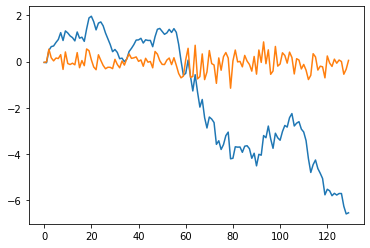

In [242]:
plt.plot(np.cumsum(return_sum))
plt.plot(return_sum)

In [243]:
result_all_rank = pd.DataFrame([])
for i in range(11):
  result_rank_X = result_rank.applymap(lambda x: 1 if x == i else (0 if x <= 1 else 0))
  result_raw_return = df_test_raw_return.loc[test_friday_index]
  result_volatility = df_f[symbols + '_volatility'].loc[test_friday_index]
  return_sum = []
  for j in range(len(result_rank_X)):
    #return_sum.append((result_rank_X.iloc[j].reset_index(drop = True) * result_raw_return.iloc[j].reset_index(drop = True)/result_volatility.iloc[j].reset_index(drop = True)).sum())
    return_sum.append((result_rank_X.iloc[j].reset_index(drop = True) * result_raw_return.iloc[j].reset_index(drop = True)).sum())
  result_all_rank[str(i)] = np.cumsum(return_sum)

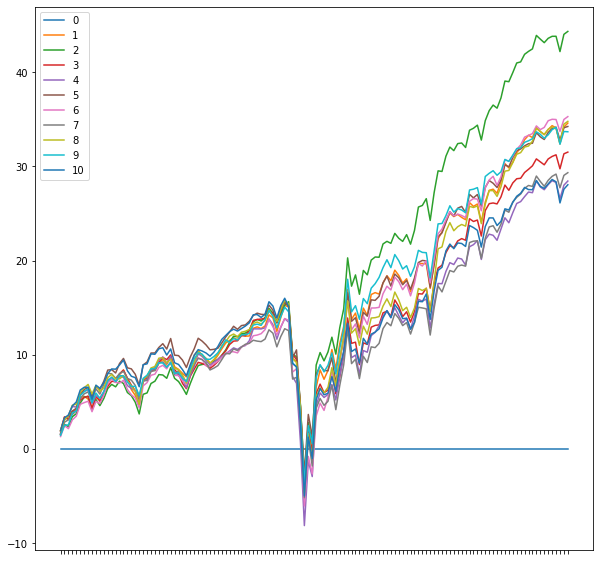

In [244]:
fig, ax = plt.subplots(figsize = (10,10))
#for i in range(1, 11):
  #ax.plot(result_all_rank.index, result_all_rank[str(i)])
ax.plot(result_all_rank)
ax.set_xticks(result_all_rank.index)
ax.tick_params(labelbottom=False)
ax.legend(result_all_rank.columns)
plt.show()